In [1]:
# the time span of the comments
# word count/ frequncy
# #number of words in each comment after stopwords have beenremoved
# length of reviews
# #display of language
# dropping none english reviews
# #word cloud
# #top keywords

# #empty cells
# #datatype and shape of text
# highest posting time, frequency of comments
# plot length of comments

# #! pip install spacy spacy-langdetect
# #! python -m spacy download en_core_web_sm

## Merging all csv files 

In [2]:
import os
import pandas as pd

# Set the paths to the folders
folder_paths = ["/workspace/IMDB_tutorial/Tari_csv/Attractions", "/workspace/IMDB_tutorial/Tari_csv/Hotels", "/workspace/IMDB_tutorial/Tari_csv/Restaurants"]

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through each folder
for folder_path in folder_paths:
    # Get the list of CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    print('1')
    
    # Loop through each CSV file in the folder
    for csv_file in csv_files:
        # Construct the full path to the CSV file
        file_path = os.path.join(folder_path, csv_file)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path,lineterminator='\n')
        
        print('2')
        # Concatenate the DataFrame to the merged_data
        merged_data = pd.concat([merged_data, df], ignore_index=True)

# Write the merged data to a new CSV file
merged_data = merged_data.drop('title', axis=1)
reddit_data = pd.read_csv('/workspace/IMDB_tutorial/Tari_csv/london_reddit_merged_data.csv')
merged_full_data = pd.concat([merged_data, reddit_data], ignore_index=True)
merged_full_data.to_csv("/workspace/IMDB_tutorial/Tari_csv/merged_full_data.csv", index=False)


1
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
2


## Checking for NaN values 

In [3]:
import pandas as pd
ed = pd.read_csv("/workspace/IMDB_tutorial/Tari_csv/merged_full_data.csv",lineterminator='\n')
empty_rows = ed.isnull().any(axis=1)
ed[empty_rows]

,date_written,content
2740,NaN,When we got near to the Tower of London there ...
2741,NaN,I'd never been to the Tower of London before (...
2742,NaN,The home of English Kings and Queens since the...
2743,NaN,"We went on a coach trip, primarily to see the ..."
2744,NaN,Couldn't leave London without seeing the Poppi...
...,...,...
52863,"Tuesday, November 28, 2023 at 12:33:23 AM GMT+1",NaN
52865,"Monday, November 27, 2023 at 9:42:22 PM GMT+1",NaN
52866,"Monday, November 27, 2023 at 9:46:46 PM GMT+1",NaN
52867,"Tuesday, November 28, 2023 at 12:20:09 PM GMT+1",NaN


## Removing NaN rows

In [4]:
ed = ed.dropna()
ed.reset_index(drop=True, inplace=True)
ed

,date_written,content
0,"February 20, 2020",An absolutely excellent stop on the tourist tr...
1,"January 30, 2020",I’ve been before but decided to get the audio ...
2,"January 15, 2020",We bought our tickets in advance and printed t...
3,"January 12, 2020","Our family visited on a cold, very crowded day..."
4,"October 24, 2023",The Tower of London is a lovely historic monum...
...,...,...
52276,"Friday, June 2, 2023 at 8:13:50 PM GMT+1",Hām in West Hampstead has been my favourite Lo...
52277,"Friday, June 2, 2023 at 8:25:15 PM GMT+1",I want to go to paradise! Its highly likely il...
52278,"Friday, June 2, 2023 at 8:46:53 PM GMT+1","For Indian, we really enjoyed Trishna."
52279,"Monday, June 5, 2023 at 9:58:54 AM GMT+1","I'd pick Bibi over Gymkhana, but both are sens..."


In [5]:
# Check DataFrame's datatype and shape
print("DataFrame Datatypes:")
print(ed.dtypes)

print("\nDataFrame Shape:")
print(ed.shape)

# Check Column's datatype and shape
print("\nColumn 'content' Datatype:")
print(ed['content'].dtype)


DataFrame Datatypes:
date_written    object
content         object
dtype: object

DataFrame Shape:
(52281, 2)

Column 'content' Datatype:
object


## Word count without stopwords

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Function to count words without stopwords
def count_words_without_stopwords(text):
    # Check if the value is a string or bytes-like object
    if isinstance(text, (str, bytes)):
        # Tokenize the text
        words = nltk.word_tokenize(str(text))
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in words if word.lower() not in stop_words]
        
        # Return the count of non-stopwords
        return len(filtered_words)
    else:
        # If the value is not a string or bytes-like, return 0
        return 0
# Apply the function to the 'Text' column and create a new column 'WordCount'
ed['WordCount'] = ed['content'].apply(count_words_without_stopwords)

# Display the DataFrame with word counts
ed



[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/gitpod/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/gitpod/nltk_data...


,date_written,content,WordCount
0,"February 20, 2020",An absolutely excellent stop on the tourist tr...,29
1,"January 30, 2020",I’ve been before but decided to get the audio ...,49
2,"January 15, 2020",We bought our tickets in advance and printed t...,93
3,"January 12, 2020","Our family visited on a cold, very crowded day...",36
4,"October 24, 2023",The Tower of London is a lovely historic monum...,112
...,...,...,...
52276,"Friday, June 2, 2023 at 8:13:50 PM GMT+1",Hām in West Hampstead has been my favourite Lo...,51
52277,"Friday, June 2, 2023 at 8:25:15 PM GMT+1",I want to go to paradise! Its highly likely il...,12
52278,"Friday, June 2, 2023 at 8:46:53 PM GMT+1","For Indian, we really enjoyed Trishna.",6
52279,"Monday, June 5, 2023 at 9:58:54 AM GMT+1","I'd pick Bibi over Gymkhana, but both are sens...",40


# Frequency of comments

In [7]:
from dateutil import parser
ed['date_written'] = ed['date_written'].str.split(' at').str[0]

ed['date_written'] = ed['date_written'].str.replace('Written', '')
def process_date(date_str):
    parts = date_str.split(', ')
    if len(parts) == 3:
        # If there are two commas in a row, remove the first word before the comma
        return ', '.join(parts[1:])
    else:
        # Leave the date string unchanged
        return date_str

# Apply the function to the 'DateColumn'
ed['date_written'] = ed['date_written'].apply(process_date)
#ed['date_written'] = pd.to_datetime(ed['date_written'], errors='coerce')

def remove_day_before_comma(date_string):
    # Check if the date string is not NaN
    if pd.notna(date_string):
        # Use string manipulation to remove the day part and the comma
        comma_index = date_string.find(',')
        if comma_index != -1:
            return date_string
        else:
            return date_string
    else:
        return date_string

ed['date_written'] = ed['date_written'].apply(remove_day_before_comma)

def standardize_date_format(date_string):
    try:
        # Use dateutil.parser to parse the date string
        parsed_date = parser.parse(date_string)

        # Format the parsed date to 'Month Year'
        formatted_date = parsed_date.strftime('%B %Y')

        return formatted_date
    except ValueError:
        # If parsing fails, return the original string
        return date_string

ed['date_written'] = ed['date_written'].apply(standardize_date_format)

ed


,date_written,content,WordCount
0,February 2020,An absolutely excellent stop on the tourist tr...,29
1,January 2020,I’ve been before but decided to get the audio ...,49
2,January 2020,We bought our tickets in advance and printed t...,93
3,January 2020,"Our family visited on a cold, very crowded day...",36
4,October 2023,The Tower of London is a lovely historic monum...,112
...,...,...,...
52276,June 2023,Hām in West Hampstead has been my favourite Lo...,51
52277,June 2023,I want to go to paradise! Its highly likely il...,12
52278,June 2023,"For Indian, we really enjoyed Trishna.",6
52279,June 2023,"I'd pick Bibi over Gymkhana, but both are sens...",40


In [8]:
ed[ed['date_written'].isna()]

,date_written,content,WordCount


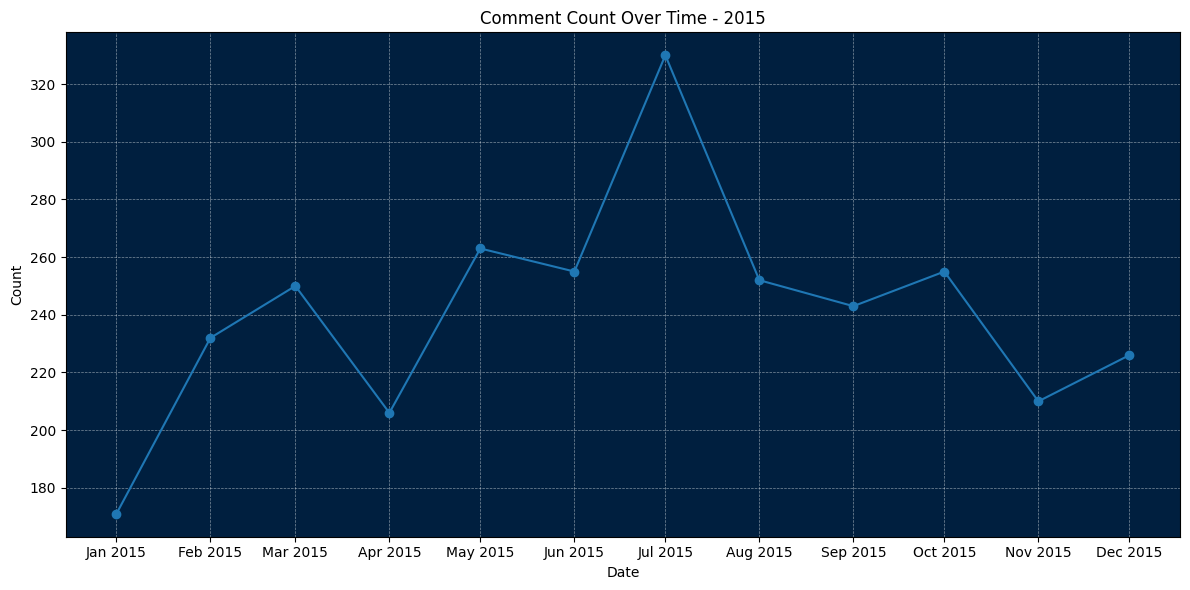

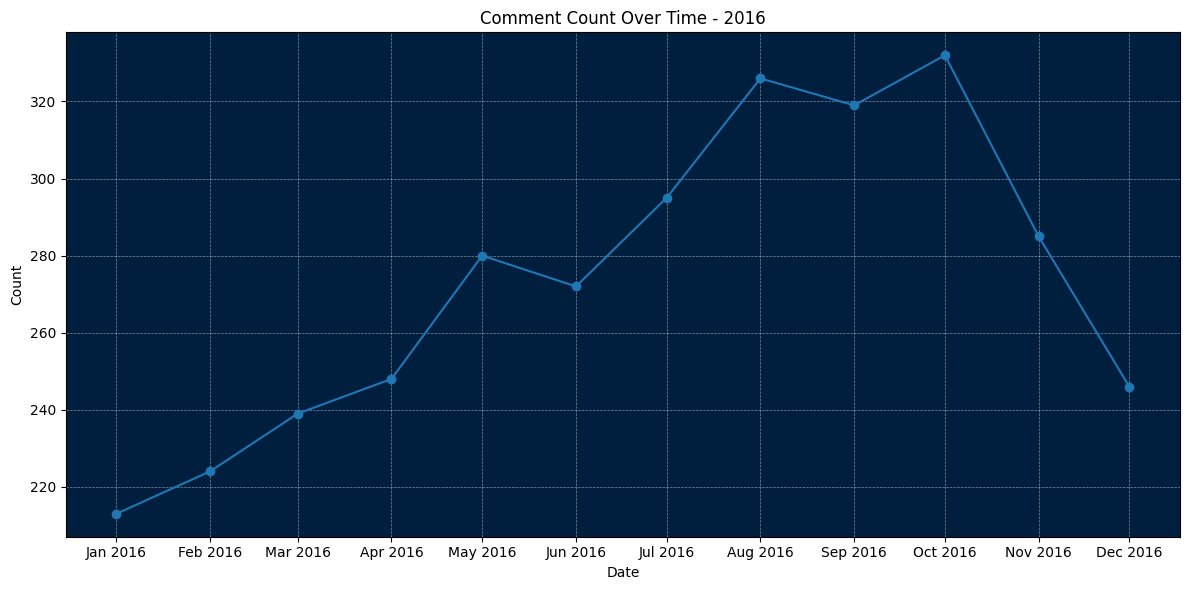

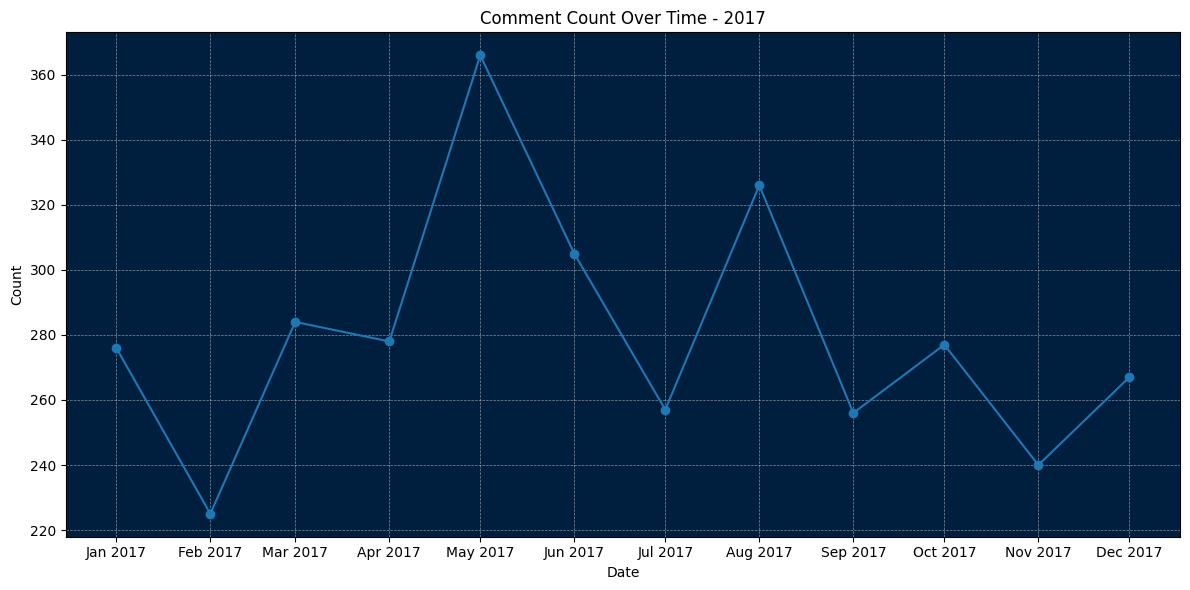

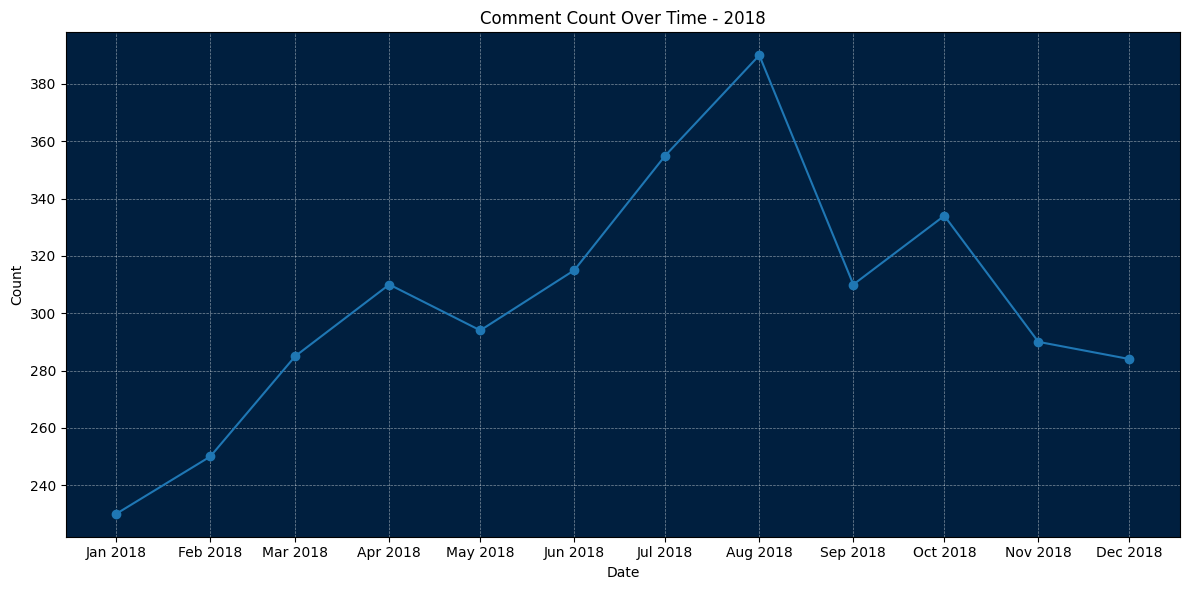

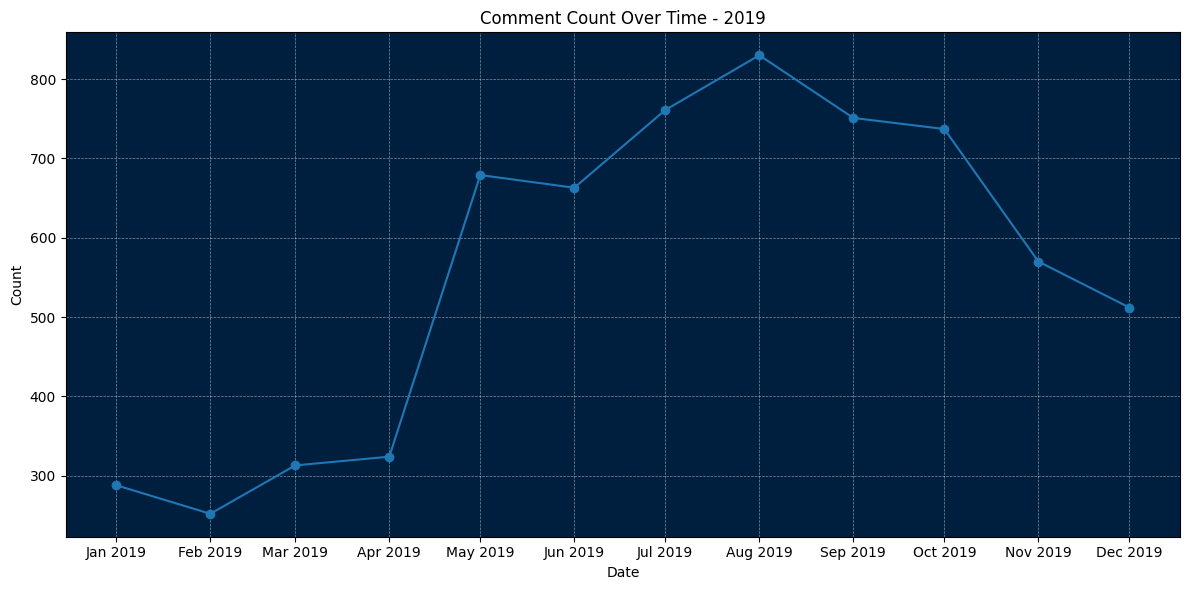

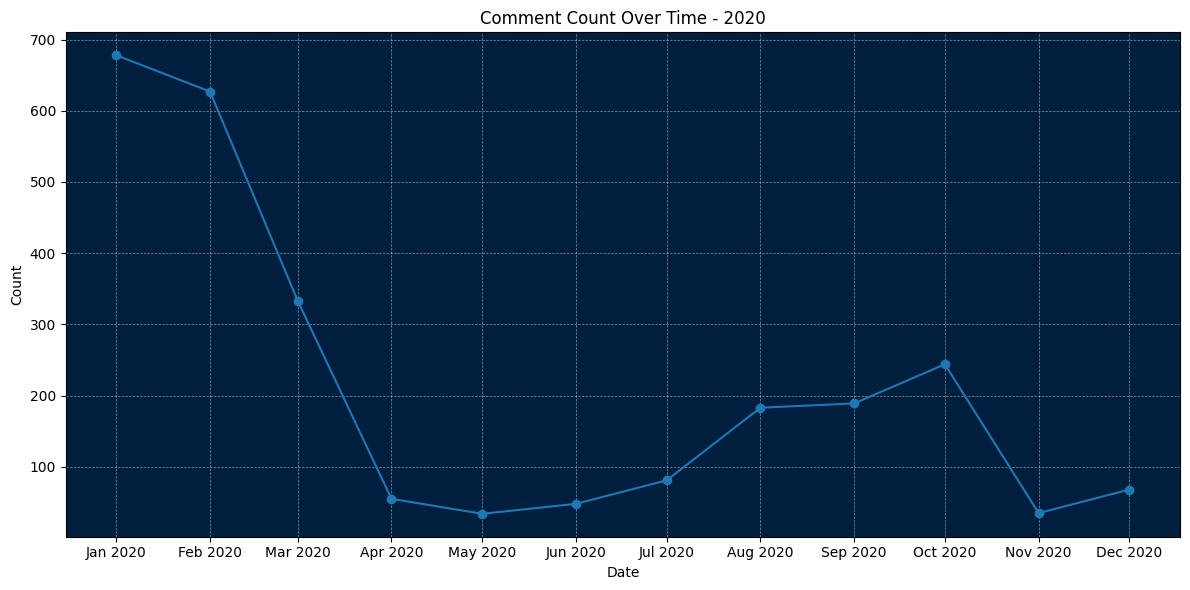

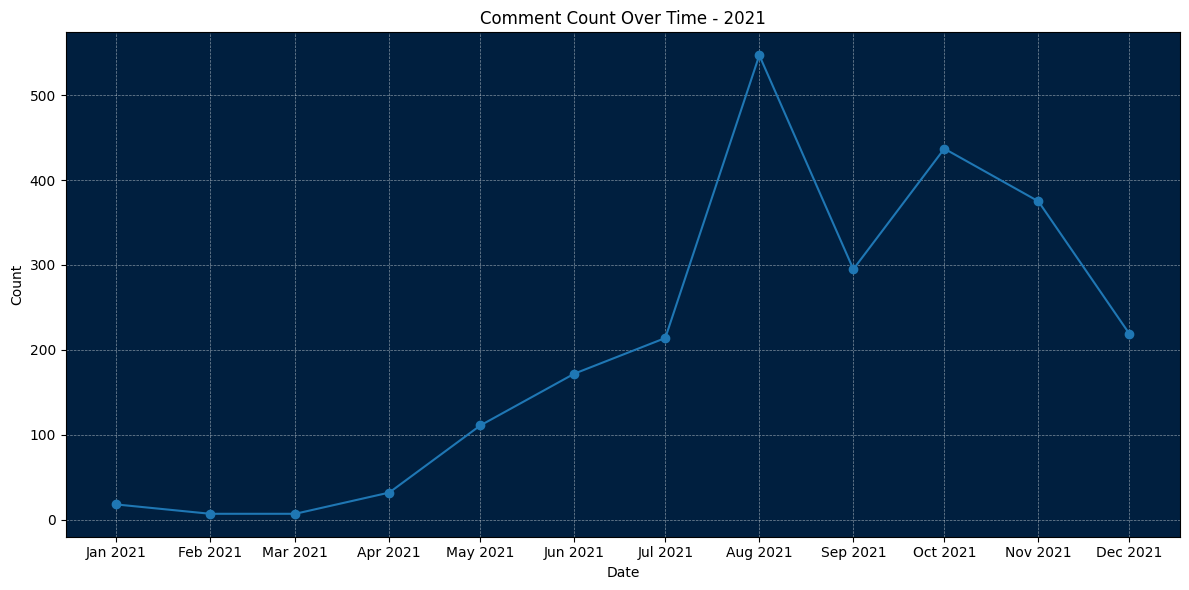

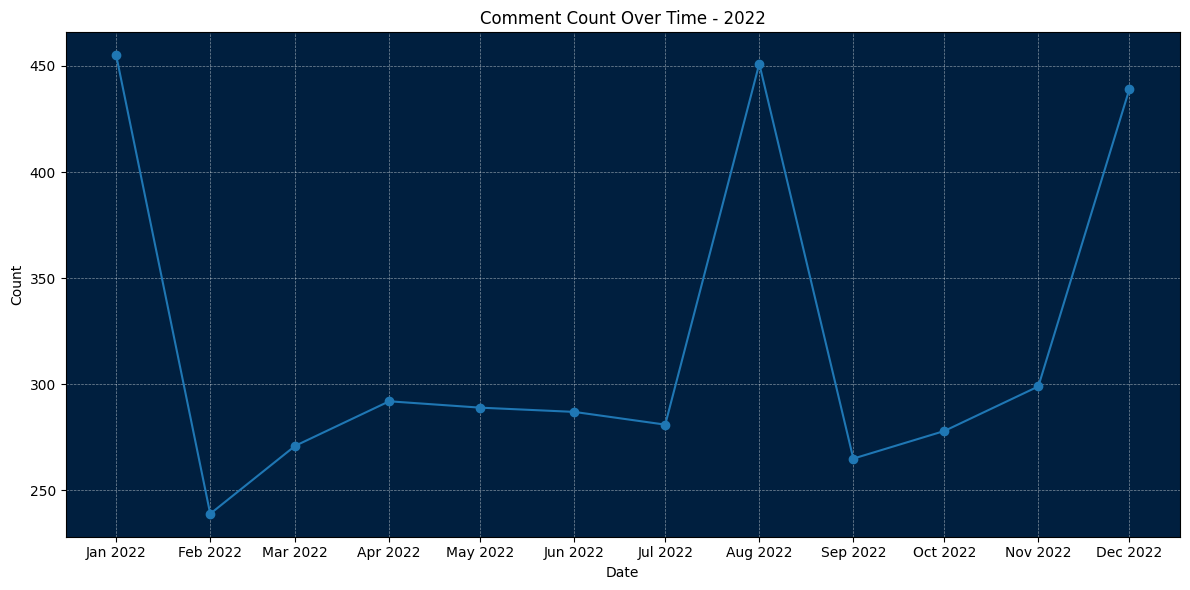

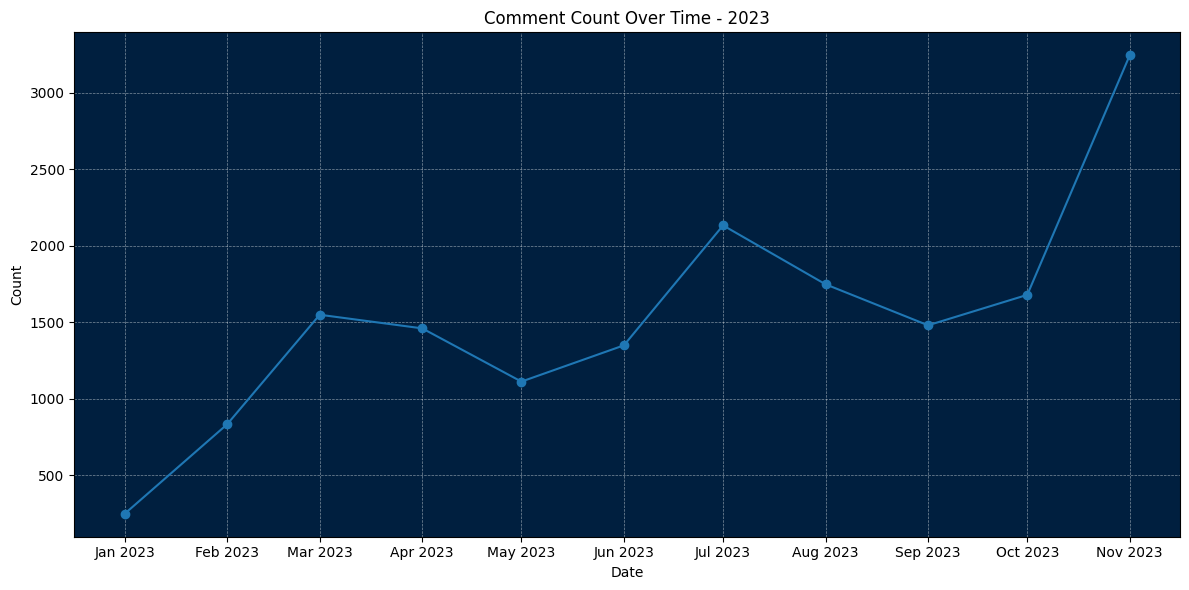

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
date_count = ed['date_written'].value_counts()
datecount = pd.DataFrame(date_count)
datecount.reset_index(inplace=True)
datecount['date_written'] = pd.to_datetime(datecount['date_written'], format='%B %Y')
filtered_df = datecount[datecount['date_written'].dt.year >= 2015]
df_sorted = filtered_df.sort_values('date_written')
grouped_by_year = df_sorted.groupby(df_sorted['date_written'].dt.year)

# Plotting for each year
for year, group in grouped_by_year:
    plt.figure(figsize=(12, 6))
    plt.plot(group['date_written'], group['count'], marker='o', linestyle='-')
    plt.gca().set_facecolor('#001f3f')
    # Format x-axis with month names
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    plt.title(f'Comment Count Over Time - {year}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.tight_layout()
    plt.show()


## Detecting language

In [10]:
import pandas as pd
import langid
import pycountry

# Function to detect language using langid
def detect_language(text):
    # Convert NaN to an empty string
    text = str(text) if pd.notna(text) else ''
    
    # Use langid to detect the language
    lang, confidence = langid.classify(text)
    return lang

ed['Language'] = ed['content'].apply(detect_language)


ed['Full_lang'] = ed['Language'].map(lambda code: pycountry.languages.get(alpha_2=code).name if pycountry.languages.get(alpha_2=code) else code)
ed


,date_written,content,WordCount,Language,Full_lang
0,February 2020,An absolutely excellent stop on the tourist tr...,29,en,English
1,January 2020,I’ve been before but decided to get the audio ...,49,en,English
2,January 2020,We bought our tickets in advance and printed t...,93,en,English
3,January 2020,"Our family visited on a cold, very crowded day...",36,en,English
4,October 2023,The Tower of London is a lovely historic monum...,112,en,English
...,...,...,...,...,...
52276,June 2023,Hām in West Hampstead has been my favourite Lo...,51,en,English
52277,June 2023,I want to go to paradise! Its highly likely il...,12,en,English
52278,June 2023,"For Indian, we really enjoyed Trishna.",6,en,English
52279,June 2023,"I'd pick Bibi over Gymkhana, but both are sens...",40,en,English


## Language distribution with en

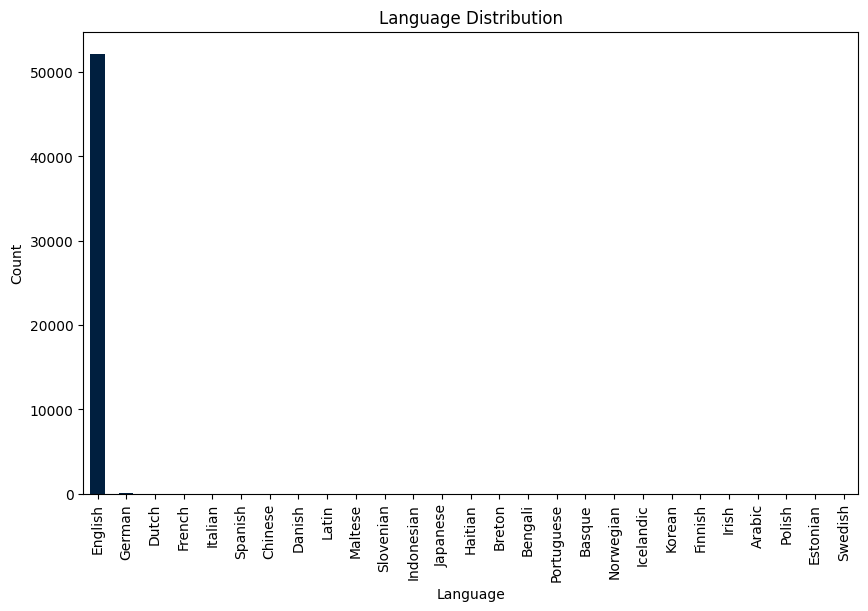

In [11]:
import matplotlib.pyplot as plt
ed['Full_lang'].value_counts().plot(kind='bar', color='#001f3f', figsize=(10, 6))

plt.grid(False)
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

## Language distribution without en

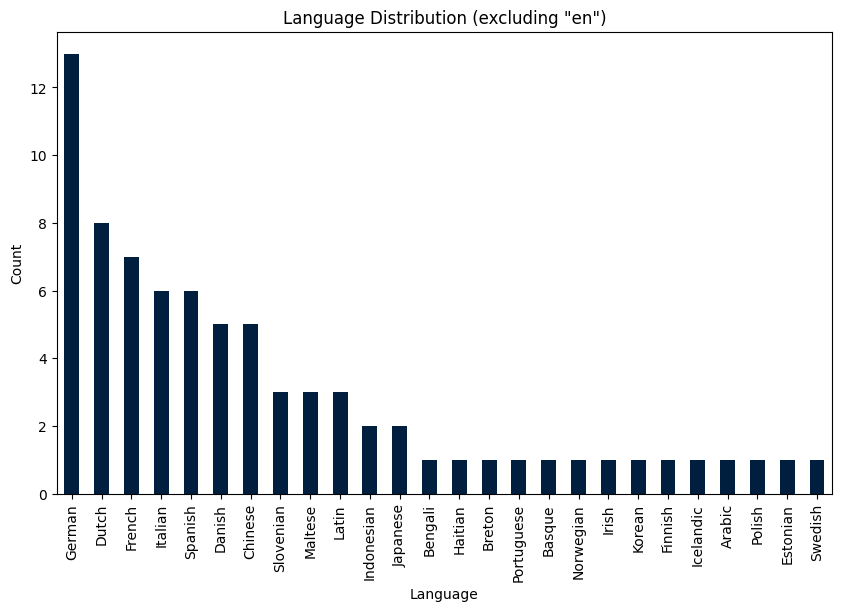

In [12]:
filtered_data = ed[ed['Language'] != 'en']

# Plot the counts after excluding 'en'
filtered_data['Full_lang'].value_counts().plot(kind='bar', color='#001f3f', figsize=(10, 6))
plt.grid(False)
plt.title('Language Distribution (excluding "en")')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


## Top Keywords

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

def get_top_keywords(tokens, top_n=30):
    # Calculate word frequencies
    freq_dist = FreqDist(tokens)
    
    # Get the top N keywords
    top_keywords = freq_dist.most_common(top_n)
    
    return top_keywords

text_data_column = ed['content']

# Convert the column values to a single text variable
text_data = ' '.join(text_data_column.astype(str).tolist())

# Preprocess the text
preprocessed_tokens = preprocess_text(text_data)

# Get the top keywords
top_keywords = get_top_keywords(preprocessed_tokens)

# Print or use the top keywords
top_keywords


[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/gitpod/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('service', 20042),
 ('staff', 19877),
 ('food', 18316),
 ('london', 17002),
 ('hotel', 16280),
 ('great', 14203),
 ('one', 13313),
 ('time', 13124),
 ('menu', 13008),
 ('restaurant', 12174),
 ('experience', 12051),
 ('us', 10491),
 ('amazing', 10436),
 ('place', 10077),
 ('would', 9979),
 ('best', 9584),
 ('room', 9581),
 ('see', 9574),
 ('wine', 8665),
 ('really', 8649),
 ('good', 8537),
 ('visit', 8514),
 ('tasting', 8018),
 ('well', 7850),
 ('course', 7558),
 ('friendly', 7529),
 ('lovely', 7528),
 ('could', 7415),
 ('excellent', 7196),
 ('museum', 7161)]

## Word Cloud

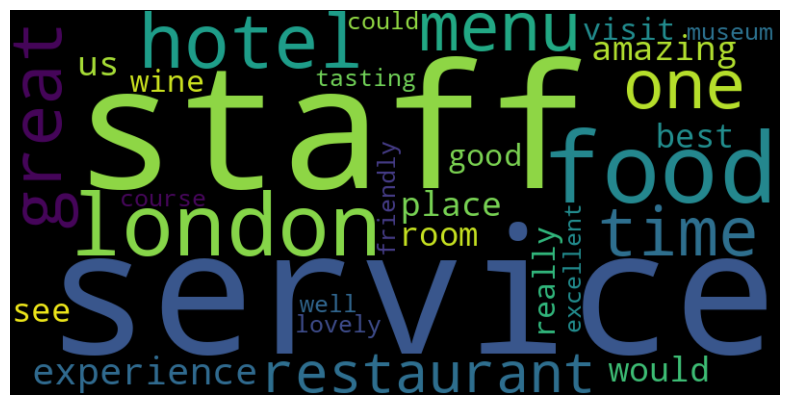

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Convert the list of tuples to a dictionary for WordCloud input
wordcloud_dict = dict(top_keywords)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_dict)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()



# Sentiment Analysis and topic modelling

## Sentiment analysis using VADER

In [15]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()


# Function to get sentiment scores and label
def get_sentiment(row):
    sentiment_scores = sid.polarity_scores(row)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, compound_score

# Apply sentiment analysis to each row of the DataFrame
ed[['Sentiment', 'Compound_Score']] = ed['content'].apply(lambda x: pd.Series(get_sentiment(x)))

# Print the DataFrame with sentiment and compound score
ed



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/gitpod/nltk_data...


,date_written,content,WordCount,Language,Full_lang,Sentiment,Compound_Score
0,February 2020,An absolutely excellent stop on the tourist tr...,29,en,English,Positive,0.8809
1,January 2020,I’ve been before but decided to get the audio ...,49,en,English,Positive,0.8816
2,January 2020,We bought our tickets in advance and printed t...,93,en,English,Positive,0.8834
3,January 2020,"Our family visited on a cold, very crowded day...",36,en,English,Positive,0.8673
4,October 2023,The Tower of London is a lovely historic monum...,112,en,English,Positive,0.9792
...,...,...,...,...,...,...,...
52276,June 2023,Hām in West Hampstead has been my favourite Lo...,51,en,English,Positive,0.2220
52277,June 2023,I want to go to paradise! Its highly likely il...,12,en,English,Positive,0.4046
52278,June 2023,"For Indian, we really enjoyed Trishna.",6,en,English,Positive,0.5563
52279,June 2023,"I'd pick Bibi over Gymkhana, but both are sens...",40,en,English,Positive,0.9885


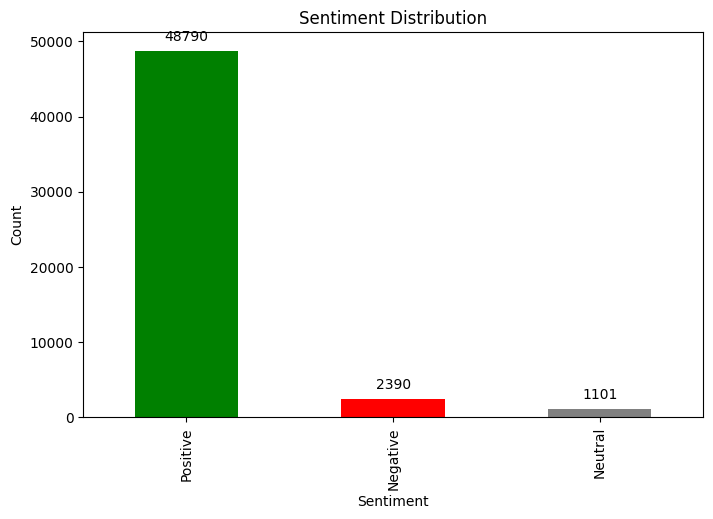

In [16]:
plt.figure(figsize=(8, 5))
ax = ed['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 1600x1000 with 0 Axes>

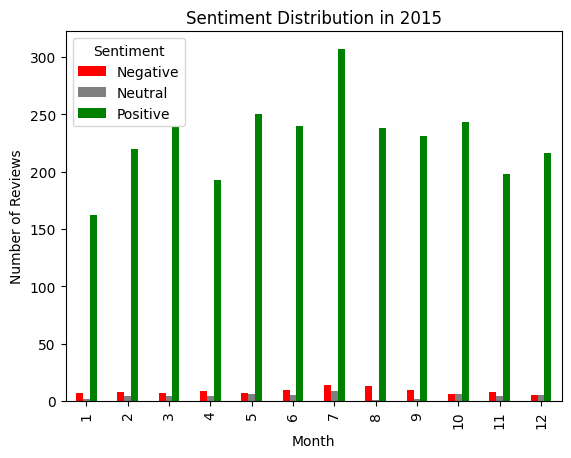

<Figure size 1600x1000 with 0 Axes>

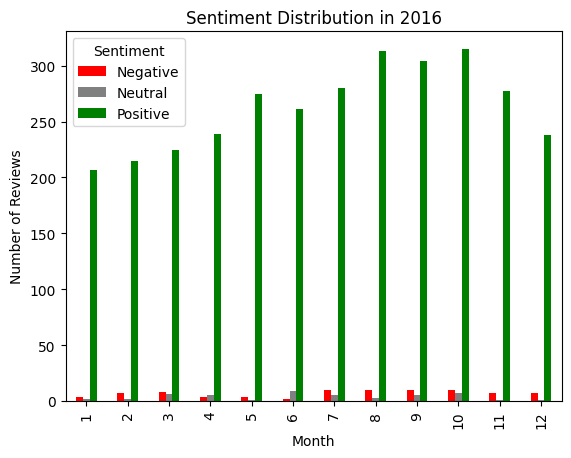

<Figure size 1600x1000 with 0 Axes>

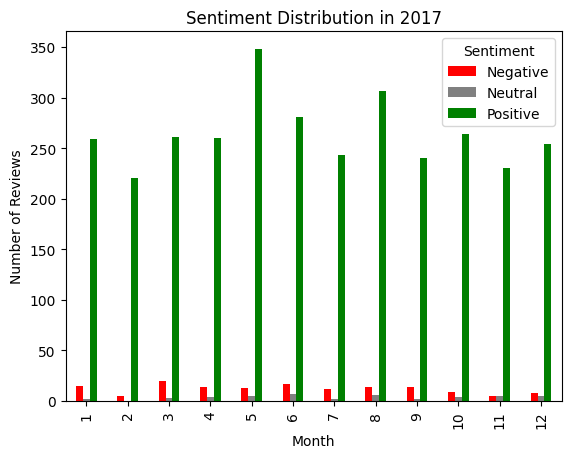

<Figure size 1600x1000 with 0 Axes>

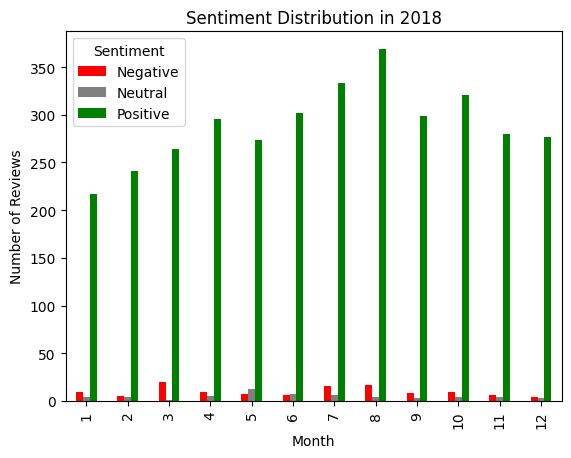

<Figure size 1600x1000 with 0 Axes>

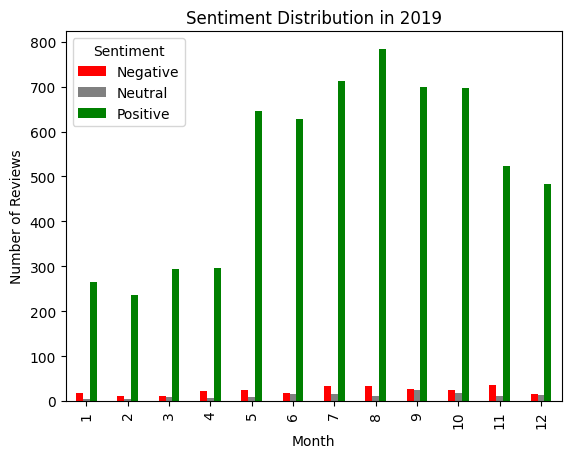

<Figure size 1600x1000 with 0 Axes>

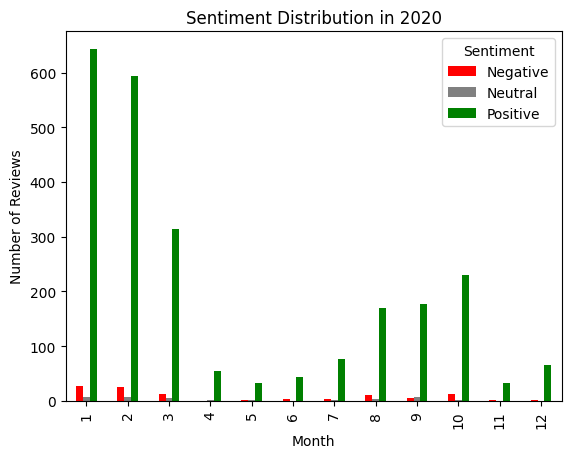

<Figure size 1600x1000 with 0 Axes>

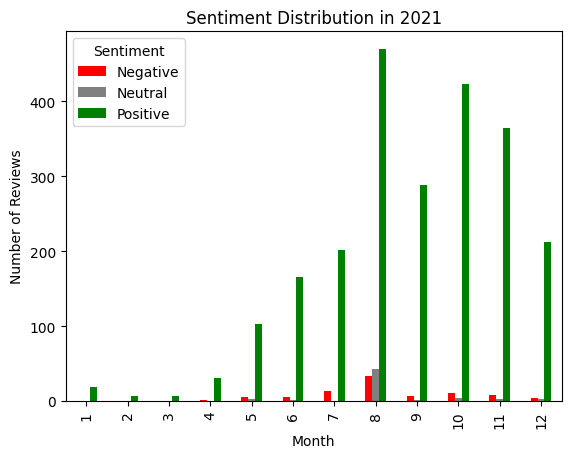

<Figure size 1600x1000 with 0 Axes>

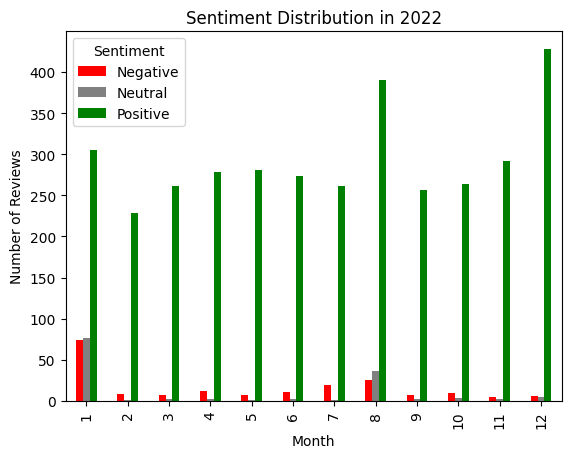

<Figure size 1600x1000 with 0 Axes>

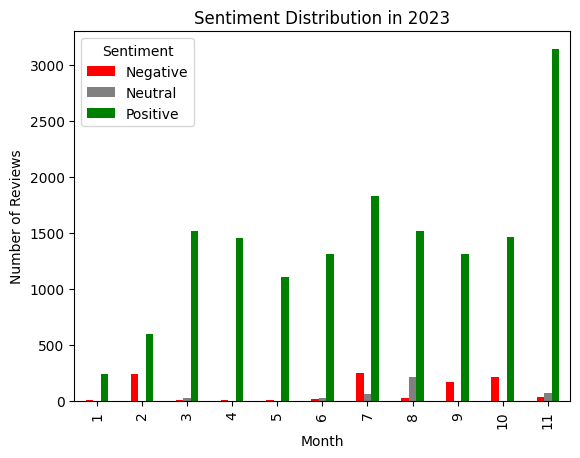

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import calendar


# Convert 'date_written' to datetime
ed['date_written'] = pd.to_datetime(ed['date_written'], format='%B %Y')
filtered_df = ed[ed['date_written'].dt.year >= 2015]
ed_sorted = filtered_df.sort_values('date_written')

# Extract Year and Month
ed_sorted['Year'] = ed_sorted['date_written'].dt.year
ed_sorted['Month'] = ed_sorted['date_written'].dt.month

# Create separate figures for each year
years =ed_sorted['Year'].unique()
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
for year in years:
    plt.figure(figsize=(16, 10))
    subset = ed_sorted[ed_sorted['Year'] == year]

    sentiment_counts = subset.groupby(['Month', 'Sentiment']).size().unstack(fill_value=0)
    sentiment_counts.plot(kind='bar', color=colors)

    plt.title(f'Sentiment Distribution in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Reviews')
    plt.legend(title='Sentiment')

    plt.show()


In [40]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# text data from df column to list
text_data = ed['content'].tolist()



def preprocess_text_list(text_list, remove_words=None, remove_single_alphabet=True):
    preprocessed_texts = []

    for text in text_list:
        # Tokenize the text
        tokens = word_tokenize(text.lower())

        # Remove stopwords, punctuation, and digits
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation and not token.isdigit()]

        # Remove specific words
        if remove_words:
            tokens = [token for token in tokens if token not in remove_words]

        # Remove 'n't' and other contractions
        tokens = [token for token in tokens if "’" not in token and "n\'t" not in token]

        # Remove singular alphabet characters
        if remove_single_alphabet:
            tokens = [token for token in tokens if len(token) > 1 or token.lower() == 'a' or token.lower() == 'i']

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        preprocessed_texts.append(tokens)

    return preprocessed_texts

preprocessed_texts_list = preprocess_text_list(text_data, remove_words=['...', '\'s', "u"], remove_single_alphabet=True)

# Preprocess each document in the text data
#preprocessed_data = [preprocess_text(doc) for doc in text_data]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(preprocessed_texts_list)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_texts_list]

# Build the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
# Visualize the LDA model
lda_vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis_data)



[nltk_data] Downloading package punkt to /home/gitpod/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gitpod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
lda_model.print_topics()

[(0,
  '0.017*"time" + 0.016*"place" + 0.014*"get" + 0.014*"one" + 0.013*"worth" + 0.013*"food" + 0.012*"nice" + 0.012*"much" + 0.011*"really" + 0.011*"go"'),
 (1,
  '0.025*"staff" + 0.021*"food" + 0.019*"service" + 0.014*"hotel" + 0.012*"friendly" + 0.012*"great" + 0.012*"place" + 0.012*"best" + 0.011*"special" + 0.011*"room"'),
 (2,
  '0.015*"london" + 0.013*"ledbury" + 0.009*"one" + 0.008*"many" + 0.008*"time" + 0.008*"five" + 0.007*"year" + 0.007*"restaurant" + 0.007*"also" + 0.007*"field"'),
 (3,
  '0.021*"u" + 0.012*"core" + 0.012*"time" + 0.011*"table" + 0.010*"first" + 0.010*"lunch" + 0.010*"came" + 0.009*"one" + 0.009*"meal" + 0.009*"would"'),
 (4,
  '0.039*"menu" + 0.031*"food" + 0.027*"wine" + 0.026*"service" + 0.024*"course" + 0.024*"restaurant" + 0.020*"tasting" + 0.020*"dish" + 0.011*"meal" + 0.011*"experience"')]